# Datenanalyse der π(x)-Vergleiche  
In diesem Notebook werten wir die CSV-Dateien aus, die durch die Daten-Pipeline erzeugt wurden:
- `data/zeros.csv`: Nicht-triviale Nullstellen  
- `data/pi_comparison.csv`: Vergleich von π(x)-Methoden  


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV-Dateien laden
zeros_df = pd.read_csv("../data/zeros.csv")
pi_df = pd.read_csv("../data/pi_comparison.csv")

## Nicht-triviale Nullstellen  
Wir sehen die ersten `len(zeros_df)` Nullstellen mit Real- und Imaginärteil.


In [2]:
zeros_df.head()

,index,real_part,imag_part
0,1,0.5,14.134725
1,2,0.5,21.022040
2,3,0.5,25.010858
3,4,0.5,30.424876
4,5,0.5,32.935062


## Fehler der π(x)-Approximationen  
- **error_approx**: |π(x) – x/ln(x)|  
- **error_explicit**: |π(x) – π_explicit(x)|  


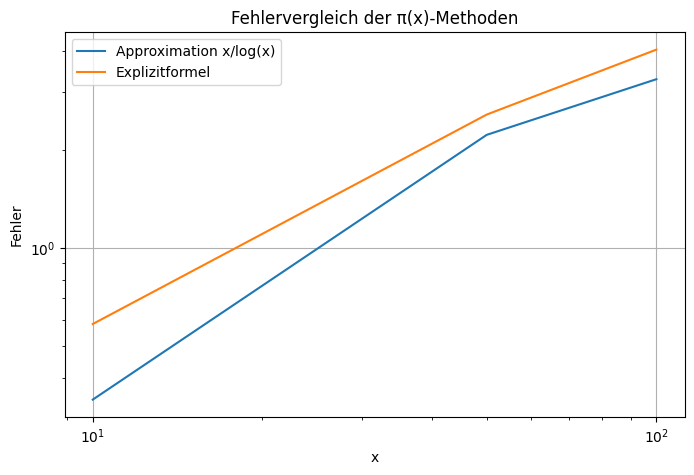

In [3]:
plt.figure(figsize=(8, 5))
plt.plot(pi_df["x"], pi_df["error_approx"], label="Approximation x/log(x)")
plt.plot(pi_df["x"], pi_df["error_explicit"], label="Explizitformel")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("x")
plt.ylabel("Fehler")
plt.title("Fehlervergleich der π(x)-Methoden")
plt.legend()
plt.grid(True)
plt.show()

## Einfluss der Anzahl der Nullstellen  
Untersucht wird, wie der Fehler der Explizitformel mit steigender Zahl an Nullstellen sinkt.


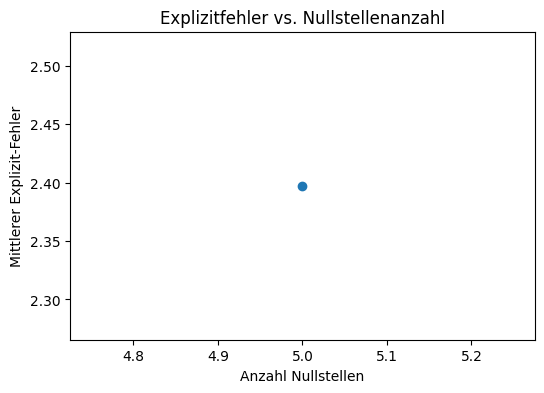

In [4]:
# Beispiele für unterschiedliche count-Werte (falls Pipeline mehrfach mit variierendem max_zero_imag
# ausgeführt wurde und Daten gespeichert wurden). Hier exemplarisch die bisherigen 5 Nullstellen.
counts = [pi_df["num_zeros_used"].iloc[0]]
errors = pi_df.groupby("num_zeros_used")["error_explicit"].mean()

plt.figure(figsize=(6, 4))
plt.plot(counts, errors, marker="o")
plt.xlabel("Anzahl Nullstellen")
plt.ylabel("Mittlerer Explizit-Fehler")
plt.title("Explizitfehler vs. Nullstellenanzahl")
plt.show()

## Heatmap der Fehlerverteilung  
(optional) Wenn Sie verschiedene Pipeline-Läufe mit variierten `max_zero_imag` und `x_values` durchgeführt haben,
können Sie eine Heatmap erstellen, die den Explizitfehler in Abhängigkeit von x und num_zeros_used zeigt.


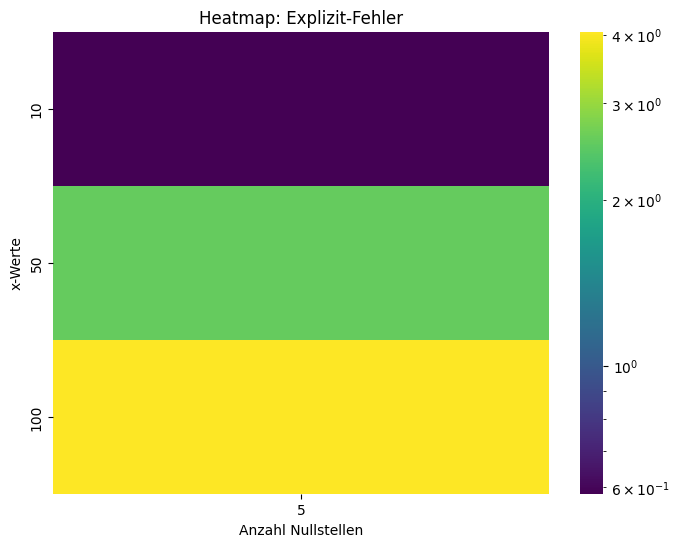

In [6]:
import seaborn as sns
from matplotlib.colors import LogNorm  # neu

pivot = pi_df.pivot(index="x", columns="num_zeros_used", values="error_explicit")
plt.figure(figsize=(8, 6))
sns.heatmap(pivot, norm=LogNorm(), cmap="viridis")  # plt.LogNorm() → LogNorm()
plt.xlabel("Anzahl Nullstellen")
plt.ylabel("x-Werte")
plt.title("Heatmap: Explizit-Fehler")
plt.show()